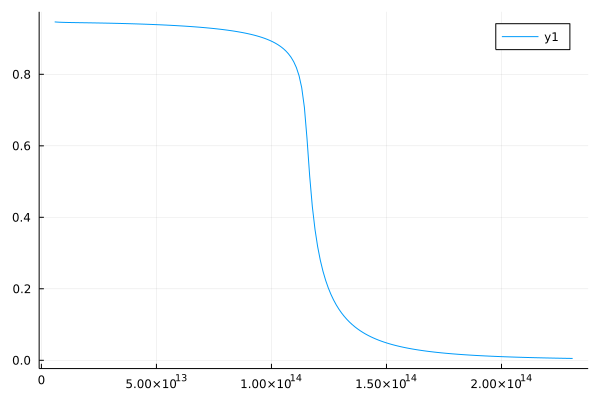

UndefVarError: UndefVarError: execute_msg not defined

In [1]:
using Plots

function PlotReflectivity()

    ε_0, e, ħ = 8.85418782e-12, 1.60217662e-19, 1.05457e-34
    ε(ω, ω_p) = 1 - ω_p^2 / ω^2


    ε_damped(ω) = 1 - (3.6e-3) / (im * ω * ε_0) #8.85418782e-12)

    ε_actual(ω, ω_p, σ) = 1 - ω_p^2 / (ω^2 + im * ω * ε_0 * ω_p^2 / σ)

    Reflectivity(ε) = abs2((√complex(ε) - 1) / (√complex(ε) + 1))

    x = range(0.1, stop = 2, step = 0.01)

    ħωp_eV = 15.2
    omega_p = 0.005 * ħωp_eV * e / ħ


    ω_range_max = omega_p * 2
    x2 = range(omega_p / 20, stop = ω_range_max, step = 0.01 * omega_p)
    # plot(x, ε(x, 1.0))
    # print(Reflectivity.(ε.(x, 1.0)))
    # print(Reflectivity.(ε_damped.(x2)))

    σ = 3.6e4

    function reflectivity_nodecay(ω::Float64, ω_p::Float64)
        if ω < ω_p
            1.0
        else
            (2ω^2 - ω_p^2 - 2ω * √(ω^2 - ω_p^2)) / (2ω^2 - ω_p^2 + 2ω * √(ω^2 - ω_p^2))
        end
    end

    # Plots.display(plot(x, Reflectivity.(ε.(x, 1.0)), label = "Reflectivity, σ = ∞ (no decay)"))
    # Plots.display(plot!(x, reflectivity_nodecay.(x, 1.0), label = "Reflectivity, σ = ∞ (no decay); after simplified"))
    # Plots.display(plot(x2, Reflectivity.(ε_damped.(x2))))
    Plots.display(plot(x2, Reflectivity.(ε_actual.(x2, omega_p, σ))))
    gui()
    readline()
end

PlotReflectivity()
